In [1]:
from phidl import Device, LayerSet
from phidl import quickplot as qp # Rename "quickplot()" to the easier "qp()"
import phidl.geometry as pg
import phidl.utilities as pu
from phidl import  Device
from phidl_build_functions import build_2x3structure, marker_device_generator, protection_pads, place_sem_structure, build_1x4resonator, build_outer_structure
from phidl_build_functions import create_and_place_dummy_bond_pads

In [2]:
scale_factor = 1


lys = LayerSet()
lys.add_layer('die', gds_layer = 0, gds_datatype = 0, alpha = 0.15)
lys.add_layer('marker', gds_layer = 1, gds_datatype = 0)
lys.add_layer('SiO2', gds_layer = 2, gds_datatype = 0)
lys.add_layer('ohmic Al_1', gds_layer = 3, gds_datatype = 0)
lys.add_layer('ohmic Al_2', gds_layer = 4, gds_datatype = 0)
lys.add_layer('ohmic Al_3', gds_layer = 5, gds_datatype = 0)
lys.add_layer('ohmic Al_4', gds_layer = 6, gds_datatype = 0)
lys.add_layer('GL1 Pd/Ti_1', gds_layer = 7, gds_datatype = 0)
lys.add_layer('GL1 Pd/Ti_2', gds_layer = 8, gds_datatype = 0)
lys.add_layer('GL1 Pd/Ti_3', gds_layer = 9, gds_datatype = 0)
lys.add_layer('GL1 Pd/Ti_4', gds_layer = 10, gds_datatype = 0)
lys.add_layer('GL2 Pd/Ti_1', gds_layer = 11, gds_datatype = 0)
lys.add_layer('GL2 Pd/Ti_2', gds_layer = 12, gds_datatype = 0)
lys.add_layer('GL2 Pd/Ti_3', gds_layer = 13, gds_datatype = 0)
lys.add_layer('GL2 Pd/Ti_4', gds_layer = 14, gds_datatype = 0)
lys.add_layer('text', gds_layer = 16, gds_datatype = 0)
lys.add_layer('screening_1', gds_layer = 17, gds_datatype = 0)
lys.add_layer('screening_2', gds_layer = 18, gds_datatype = 0)
lys.add_layer('screening_3', gds_layer = 19, gds_datatype = 0)
lys.add_layer('screening_4', gds_layer = 20, gds_datatype = 0)





layer_dot_array = [lys['GL2 Pd/Ti_1'], lys['GL2 Pd/Ti_2'], lys['GL2 Pd/Ti_3'], lys['GL2 Pd/Ti_4']]

layer_screening_array = [lys['screening_1'], lys['screening_2'], lys['screening_3'], lys['screening_4']]

layer_barrier_array = [lys['GL1 Pd/Ti_1'], lys['GL1 Pd/Ti_2'], lys['GL1 Pd/Ti_3'], lys['GL1 Pd/Ti_4']]

layer_ohmic_array = [lys['ohmic Al_1'], lys['ohmic Al_2'], lys['ohmic Al_3'], lys['ohmic Al_4']]

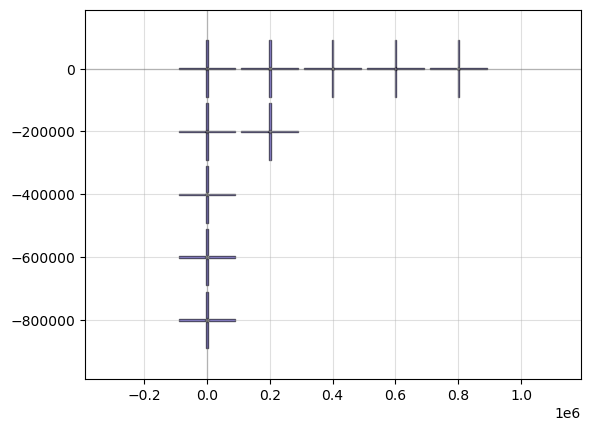

In [3]:
x_top_left = [0, 1, 2, 3, 4, 0, 1, 0, 0, 0]
y_top_left = [0, 0, 0, 0, 0, -1, -1, -2, -3, -4]

x_bottom_left = [0, 1, 2, 3, 4, 0, 1, 0, 0, 0]
y_bottom_left = [0, 0, 0, 0, 0, 1, 1, 2, 3, 4]

x_bottom_right = [0, -1, -2, -3, -4, 0, -1, 0, 0, 0]
y_bottom_right = [0, 0, 0, 0, 0, 1, 1, 2, 3, 4]

x_top_right = [0, -1, -2, -3, -4, 0, -1, 0, 0, 0]
y_top_right = [0, 0, 0, 0, 0, -1, -1, -2, -3, -4]

top_left_markers = marker_device_generator(x_top_left, y_top_left)
top_right_markers = marker_device_generator(x_top_right, y_top_right)
bottom_left_markers = marker_device_generator(x_bottom_left, y_bottom_left)
bottom_right_markers = marker_device_generator(x_bottom_right, y_bottom_right)

qp(top_left_markers)

In [4]:
width_die = 6e6
length_die = 6e6

layer_die = lys['die']

min_distance_bond_pads_from_border = 900e3#nm
min_distance_text_from_border = 200e3 #nm

min_distance_marker_from_border = 100e3 #nm
separation_markers = 20e3
layer_text = lys['text']

layer_slice_visuals = lys['marker']
visual_marker_length = 700e3
visual_marker_width = 150e3

protection_extra = 20e3
length_extension_protection_bonding_pad = 15e3 #nm
width_extension_protection_bonding_pad = 15e3 #nm
layer_protection_bonding_pad = lys['SiO2']

width_bonding_pad = 130e3 #nm
length_bonding_pad = 130e3

length_dummy_bonding_pad = length_bonding_pad#1e6 #nm
width_dummy_bonding_pad = width_bonding_pad#150e3 #nm

distance_structure_from_center = 0.22

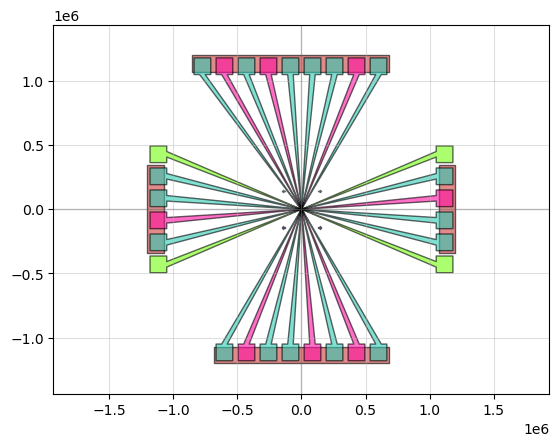

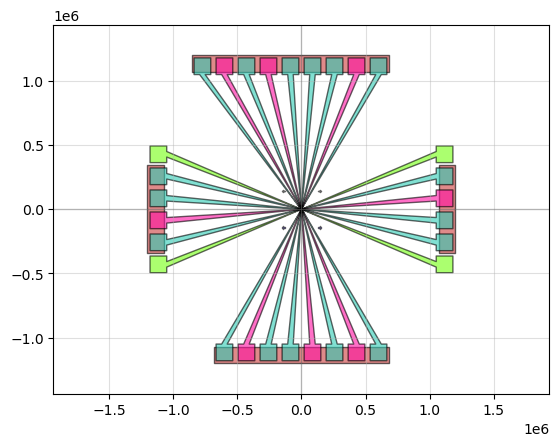

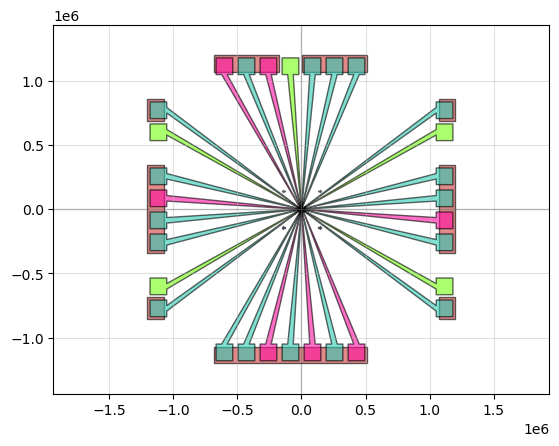

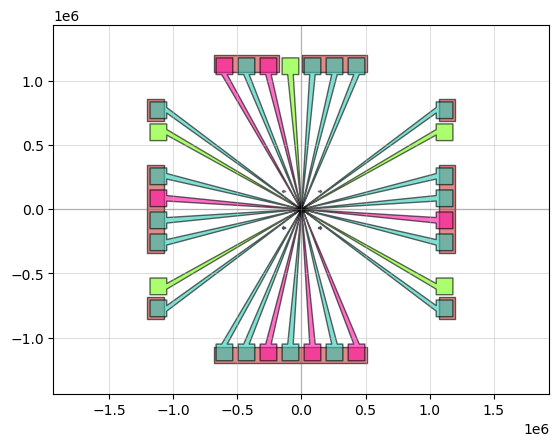

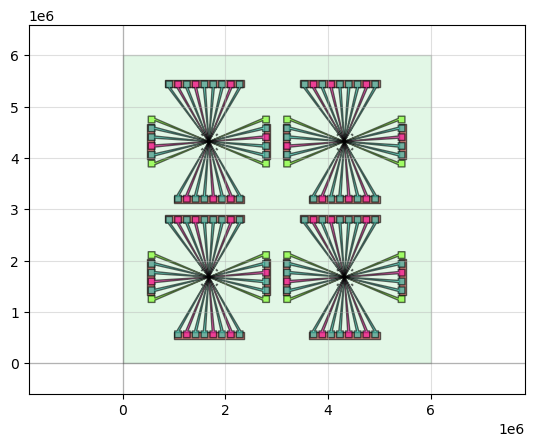

In [5]:
die_device = Device()

scaling = 1

Marker_structure_1, sem_structure_1, ref_structure_1, list_of_numbers_1, ext_ports_1, bond_numbers_1, layer_pads_1 = build_2x3structure(0, layer_dot_array, layer_barrier_array, layer_screening_array, layer_ohmic_array)
Marker_structure_2, sem_structure_2, ref_structure_2, list_of_numbers_2, ext_ports_2, bond_numbers_2, layer_pads_2 = build_2x3structure(1, layer_dot_array, layer_barrier_array, layer_screening_array, layer_ohmic_array)
Marker_structure_3, sem_structure_3, ref_structure_3, list_of_numbers_3, ext_ports_3, bond_numbers_3, layer_pads_3 = build_1x4resonator(2, layer_dot_array, layer_barrier_array, layer_screening_array, layer_ohmic_array, scaling)
Marker_structure_4, sem_structure_4, ref_structure_4, list_of_numbers_4, ext_ports_4, bond_numbers_4, layer_pads_4 = build_1x4resonator(3, layer_dot_array, layer_barrier_array, layer_screening_array, layer_ohmic_array, scaling)

prod_pads_N_1x4 = [[2, 0], [6, 4]]
prod_pads_S_1x4 = [[6, 0]]
prod_pads_W_1x4 = [[0, 0], [7, 7], [5, 2]]
prod_pads_E_1x4 = [[0, 0], [7, 7], [5, 2]]

prod_pads_N_2x3 = [[8, 0]]
prod_pads_S_2x3 = [[7, 0]]
prod_pads_W_2x3 = [[4, 1]]
prod_pads_E_2x3 = [[4, 1]]

prod_pads_1x4 = [prod_pads_N_1x4, prod_pads_S_1x4, prod_pads_W_1x4, prod_pads_E_1x4]
prod_pads_2x3 = [prod_pads_N_2x3, prod_pads_S_2x3, prod_pads_W_2x3, prod_pads_E_2x3]

full_structure_1 = build_outer_structure(ref_structure_1, list_of_numbers_1, bond_numbers_1, ext_ports_1, prod_pads_2x3, layer_pads_1)
full_structure_2 = build_outer_structure(ref_structure_2, list_of_numbers_2, bond_numbers_2, ext_ports_2, prod_pads_2x3, layer_pads_2)
full_structure_3 = build_outer_structure(ref_structure_3, list_of_numbers_3, bond_numbers_3, ext_ports_3, prod_pads_1x4, layer_pads_3)
full_structure_4 = build_outer_structure(ref_structure_4, list_of_numbers_4, bond_numbers_4, ext_ports_4, prod_pads_1x4, layer_pads_4)


rect_die = die_device << pg.rectangle(size = (length_die, width_die), layer = layer_die)

ref_structure_1_ref = die_device.add_ref(full_structure_1)
ref_structure_2_ref = die_device.add_ref(full_structure_1)
ref_structure_3_ref = die_device.add_ref(full_structure_1)
ref_structure_4_ref = die_device.add_ref(full_structure_1)


ref_structure_1_ref.xmin =  rect_die.center[0] + distance_structure_from_center*width_die - 0.5*(full_structure_1.xmax - full_structure_1.xmin)
ref_structure_1_ref.ymax = rect_die.center[1] - distance_structure_from_center*width_die + 0.5*(full_structure_1.ymax - full_structure_1.ymin)

ref_structure_2_ref.xmin =  rect_die.center[0] - distance_structure_from_center*width_die - 0.5*(full_structure_2.xmax - full_structure_2.xmin)
ref_structure_2_ref.ymax = rect_die.center[1] - distance_structure_from_center*width_die + 0.5*(full_structure_2.ymax - full_structure_2.ymin)

ref_structure_3_ref.xmax =  rect_die.center[0] - distance_structure_from_center*width_die + 0.5*(full_structure_3.xmax - full_structure_3.xmin)
ref_structure_3_ref.ymin = rect_die.center[1] + distance_structure_from_center*width_die - 0.5*(full_structure_3.ymax - full_structure_3.ymin)

ref_structure_4_ref.xmin =  rect_die.center[0] + distance_structure_from_center*width_die - 0.5*(full_structure_4.xmax - full_structure_4.xmin)
ref_structure_4_ref.ymin = rect_die.center[1] + distance_structure_from_center*width_die - 0.5*(full_structure_4.ymax - full_structure_4.ymin)

qp(die_device)

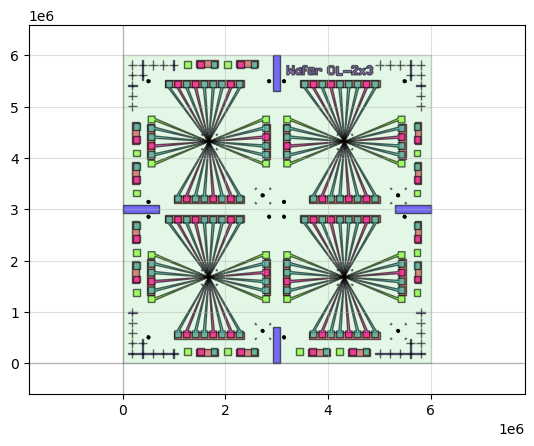

In [6]:
text_die = die_device << pg.text(text='Wafer OL-2x3', size=1.8e5, justify='center', layer=layer_text, font='DEPLOF')
text_die.ymax = rect_die.ymax - min_distance_text_from_border
text_die.xmin = rect_die.center[0] + min_distance_text_from_border

# Adding markers to the chip


ref_markers_1 = die_device.add_ref(top_left_markers)
ref_markers_2 = die_device.add_ref(top_right_markers)
ref_markers_3 = die_device.add_ref(bottom_right_markers)
ref_markers_4 = die_device.add_ref(bottom_left_markers)

ref_markers_1.xmin =  rect_die.xmin + min_distance_marker_from_border 
ref_markers_1.ymax = rect_die.ymax - min_distance_marker_from_border

ref_markers_2.xmax =  rect_die.xmax - min_distance_marker_from_border 
ref_markers_2.ymax = rect_die.ymax - min_distance_marker_from_border

ref_markers_3.xmax =  rect_die.xmax - min_distance_marker_from_border 
ref_markers_3.ymin = rect_die.ymin + min_distance_marker_from_border

ref_markers_4.xmin =  rect_die.xmin + min_distance_marker_from_border 
ref_markers_4.ymin = rect_die.ymin + min_distance_marker_from_border

# Adding dummy bonding pads

spacing_dummy_bonding_pads = 130e3 #nm

amount_dummy_bonding_pads = 6

dummy_pads_distance_from_center = 250e3

dummy_pads_distance_from_side = 200e3


dummy_pads_NN = create_and_place_dummy_bond_pads(die_device, amount_dummy_bonding_pads, 
        length_dummy_bonding_pad, width_dummy_bonding_pad, spacing_dummy_bonding_pads, 'x',
    destination = (rect_die.center[0] - 1.5*dummy_pads_distance_from_center - 5*spacing_dummy_bonding_pads - 6*width_dummy_bonding_pad, rect_die.ymax - dummy_pads_distance_from_center))
dummy_pads_NW = create_and_place_dummy_bond_pads(die_device, amount_dummy_bonding_pads,
        width_dummy_bonding_pad, length_dummy_bonding_pad, spacing_dummy_bonding_pads, 'y',
    destination = ((rect_die.xmin + dummy_pads_distance_from_side, rect_die.center[1] + dummy_pads_distance_from_center)))
dummy_pads_SW = create_and_place_dummy_bond_pads(die_device, amount_dummy_bonding_pads,
        width_dummy_bonding_pad, length_dummy_bonding_pad, spacing_dummy_bonding_pads, 'y',
    destination = (rect_die.xmin + dummy_pads_distance_from_side, rect_die.center[1] - dummy_pads_distance_from_center - 5*spacing_dummy_bonding_pads - 6*width_dummy_bonding_pad))
dummy_pads_SSW = create_and_place_dummy_bond_pads(die_device, amount_dummy_bonding_pads,
        length_dummy_bonding_pad, width_dummy_bonding_pad, spacing_dummy_bonding_pads, 'x',
    destination = (rect_die.center[0] - 1.5*dummy_pads_distance_from_center - 5*spacing_dummy_bonding_pads - 6*width_dummy_bonding_pad, rect_die.ymin + dummy_pads_distance_from_center/1.5))
dummy_pads_SSE = create_and_place_dummy_bond_pads(die_device, amount_dummy_bonding_pads,
        length_dummy_bonding_pad, width_dummy_bonding_pad, spacing_dummy_bonding_pads, 'x',
    destination = (rect_die.center[0] + 1.5*dummy_pads_distance_from_center, rect_die.ymin + dummy_pads_distance_from_center/1.5))
dummy_pads_SE = create_and_place_dummy_bond_pads(die_device, amount_dummy_bonding_pads,
        width_dummy_bonding_pad, length_dummy_bonding_pad, spacing_dummy_bonding_pads, 'y',
    destination = (rect_die.xmax - dummy_pads_distance_from_side - length_dummy_bonding_pad, rect_die.center[1] - dummy_pads_distance_from_center - 5*spacing_dummy_bonding_pads - 6*width_dummy_bonding_pad))
dummy_pads_NE = create_and_place_dummy_bond_pads(die_device, amount_dummy_bonding_pads,
        width_dummy_bonding_pad, length_dummy_bonding_pad, spacing_dummy_bonding_pads, 'y',
    destination = (rect_die.xmax - dummy_pads_distance_from_side  - length_dummy_bonding_pad, rect_die.center[1] + dummy_pads_distance_from_center))


# Adding sem devices


place_sem_structure(die_device, Marker_structure_1, sem_structure_1, ref_structure_1_ref)
place_sem_structure(die_device, Marker_structure_2, sem_structure_2, ref_structure_2_ref)
place_sem_structure(die_device, Marker_structure_3, sem_structure_3, ref_structure_3_ref)
place_sem_structure(die_device, Marker_structure_4, sem_structure_4, ref_structure_4_ref)

#adding protection to dummy bonding pads

for_protection_N = [dummy_pads_NN]

for_protection_SS = [dummy_pads_SSW, dummy_pads_SSE]

for_protection_W = [dummy_pads_SW, dummy_pads_NW]

for_protection_E = [dummy_pads_SE, dummy_pads_NE]

for pads in for_protection_N:
    protection_pad = protection_pads(die_device, (pads[2].xmax + protection_extra - (pads[1].xmin - protection_extra)), length_dummy_bonding_pad,
            destination = (pads[1].xmin - protection_extra, pads[1].ymin + protection_extra))
    protection_pad = protection_pads(die_device, (pads[5].xmax + protection_extra - (pads[4].xmin - protection_extra)), length_dummy_bonding_pad,
            destination = (pads[4].xmin - protection_extra, pads[4].ymin + protection_extra))
    
for pads in for_protection_SS:
    protection_pad = protection_pads(die_device, (pads[2].xmax + protection_extra - (pads[1].xmin - protection_extra)), length_dummy_bonding_pad,
            destination = (pads[1].xmin - protection_extra, pads[1].ymin - protection_extra))
    protection_pad = protection_pads(die_device, (pads[5].xmax + protection_extra - (pads[4].xmin - protection_extra)), length_dummy_bonding_pad,
            destination = (pads[4].xmin - protection_extra, pads[4].ymin - protection_extra))
 
for pads in for_protection_E:
    protection_pad = protection_pads(die_device, (pads[2].xmax - protection_extra - (pads[1].xmin - protection_extra)), 2*width_dummy_bonding_pad + spacing_dummy_bonding_pads + 2*protection_extra,
            destination = (pads[1].xmin + protection_extra, pads[1].ymin - protection_extra))
    protection_pad = protection_pads(die_device, (pads[5].xmax - protection_extra - (pads[4].xmin - protection_extra)), 2*width_dummy_bonding_pad + spacing_dummy_bonding_pads + 2*protection_extra,
            destination = (pads[4].xmin + protection_extra, pads[4].ymin - protection_extra))
    

for pads in for_protection_W:
    protection_pad = protection_pads(die_device, (pads[2].xmax - protection_extra - (pads[1].xmin - protection_extra)), 2*width_dummy_bonding_pad + spacing_dummy_bonding_pads + 2*protection_extra,
            destination = (pads[1].xmin - protection_extra, pads[1].ymin - protection_extra))
    protection_pad = protection_pads(die_device, (pads[5].xmax - protection_extra - (pads[4].xmin - protection_extra)), 2*width_dummy_bonding_pad + spacing_dummy_bonding_pads + 2*protection_extra,
            destination = (pads[4].xmin - protection_extra, pads[4].ymin - protection_extra))

# Add visual platinum markers for array slicing

visual_marker_west = die_device << pg.rectangle(size = (visual_marker_length, visual_marker_width), layer = layer_slice_visuals)
visual_marker_west.move(destination = (rect_die.center[0] - 0.5*width_die, rect_die.center[1] - 0.5*visual_marker_width))

visual_marker_east = die_device << pg.rectangle(size = (visual_marker_length, visual_marker_width), layer = layer_slice_visuals)
visual_marker_east.move(destination = (rect_die.center[0] + 0.5*width_die - visual_marker_length, rect_die.center[1] - 0.5*visual_marker_width))

visual_marker_south = die_device << pg.rectangle(size = (visual_marker_width, visual_marker_length), layer = layer_slice_visuals)
visual_marker_south.move(destination = (rect_die.center[0] - 0.5*visual_marker_width, rect_die.center[1] - 0.5*length_die))

visual_marker_north = die_device << pg.rectangle(size = (visual_marker_width, visual_marker_length), layer = layer_slice_visuals)
visual_marker_north.move(destination = (rect_die.center[0] - 0.5*visual_marker_width, rect_die.center[1] + 0.5*length_die - visual_marker_length))

qp(die_device)

d_die = pg.union(die_device, by_layer = True)

In [7]:
pu.write_lyp('2x3_1x4_props.lyp', layerset = lys)

d_die.write_gds(filename = '1x4_and_2x3.gds', # Output GDS file name
            unit = 1e-9,                  # Base unit (1e-6 = microns)
            precision = 1e-9,             # Precision / resolution (1e-9 = nanometers)
            auto_rename = True,           # Automatically rename cells to avoid collisions
            max_cellname_length = 28,     # Max length of cell names
            cellname = 'toplevel'         # Name of output top-level cell
           )


'1x4_and_2x3.gds'